In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/train/1' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/train/2' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/train/3' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/validation/1' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/validation/2' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/validation/3' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test/1' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test/2' | wc -l
! ls '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test/3' | wc -l

567
1142
745
70
141
92
71
143
93


# imports


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed


# from tensorflow.python.keras.applications import vgg16
# from tensorflow.python.keras.applications.vgg16 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
#from tensorflow.python.keras.callbacks import ModelCheckpoint
# from tensorflow.python.keras import layers, models, Model,optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

#from tensorflow.keras import optimizers

#from keras.optimizers import Adam

from keras import optimizers



import keras
from sklearn import metrics
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
# from keras.applications.densenet201 import DenseNet121
from keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# from tensorflow.keras import optimizers
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# from IPython.display import Image, display
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix
# from sklearn.model_selection import train_test_split
# from IPython.display import Image

In [ ]:
train_data_dir = '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/train' 
val_data_dir ='/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test'
test_data_dir = '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/validation'

In [ ]:
img_height, img_width = 224,224
conv_base =VGG19(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb3cc100bd0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3cbbb4ad0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3cb30e490> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb3c314cbd0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c06ff1d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c06ffc90> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb3c07065d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c070aed0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c0711550> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c070e5d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c0720150> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb3c072a410> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c0725f90> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c0706950> True
<keras.layers.convolutional.Conv2D object at 0x7fb3c06b7410> True
<keras.l

Text(0.5, 1.0, 'Number of training images per category:')

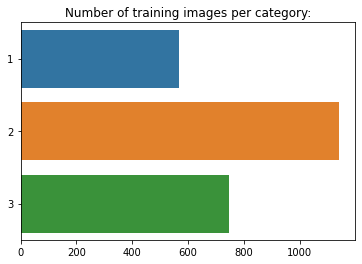

In [ ]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dense(nb_categories, activation='softmax'))
model.summary()


# for layer in conv_base.layers:
#   layer.trainable = False
  

  

# #folders = glob('/content/drive/My Drive/datasets_image/brain_tumor/train/*')
  


# x = Flatten()(conv_base.output)

# prediction = Dense(nb_categories, activation='softmax')(x)

# model = Model(inputs=conv_base.input, outputs=prediction)


# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
test_datagen =  ImageDataGenerator(
    rescale=1./255
)

In [ ]:
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2454 images belonging to 3 classes.
Total number of images for "validation":
Found 307 images belonging to 3 classes.
Total number of images for "testing":
Found 303 images belonging to 4 classes.


In [ ]:
learning_rate = .00001
epochs =100
#checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics = ['acc','AUC'])




In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator.
                              #callbacks=[checkpoint]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
77/77 [==============================] - 338s 4s/step - loss: 0.7063 - acc: 0.6850 - auc: 0.8647 - val_loss: 0.8572 - val_acc: 0.5896 - val_auc: 0.7935
Epoch 2/100
77/77 [==============================] - 49s 635ms/step - loss: 0.3068 - acc: 0.8810 - auc: 0.9754 - val_loss: 0.9133 - val_acc: 0.5635 - val_auc: 0.8038
Epoch 3/100
77/77 [==============================] - 50s 644ms/step - loss: 0.2148 - acc: 0.9156 - auc: 0.9872 - val_loss: 1.7099 - val_acc: 0.5570 - val_auc: 0.7382
Epoch 4/100
77/77 [==============================] - 49s 630ms/step - loss: 0.1367 - acc: 0.9491 - auc: 0.9946 - val_loss: 1.2180 - val_acc: 0.5896 - val_auc: 0.8034
Epoch 5/100
77/77 [==============================] - 49s 629ms/step - loss: 0.0900 - acc: 0.9690 - auc: 0.9979 - val_loss: 1.3837 - val_acc: 0.5668 - val_auc: 0.7789
Epoch 6/100
77/77 [==============================] - 49s 630ms/step - loss: 0.0752 - acc: 0.9694 - auc: 0.9984 - val_loss: 1.4531 - val_acc: 0.5537 - val_auc: 0.7940
Epoch 

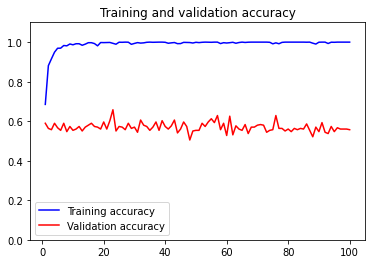

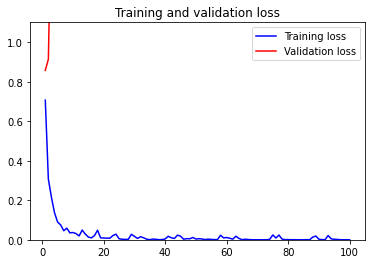

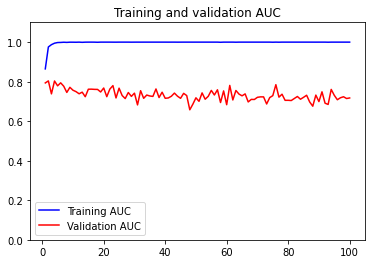

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Loss.png')

plt.figure()
plt.plot(epochs, AUC, 'b', label = 'Training AUC')
plt.plot(epochs, val_AUC, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('AUC.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
#  “””
#  This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#  “””
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
  
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment='center',
  color='white' if cm[i, j] > thresh else 'black')
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
#plot_confusion_matrix(cm, labels = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')
#plot_confusion_matrix(cm, labels = category_names,  normalize=False)#, figname = 'Confusion_matrix_concrete.jpg', title='Confusion Matrix'

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cm)

[[  0   0   0   0]
 [ 57   1  12   0]
 [  0 141   0   0]
 [  3   0  89   0]]


In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 0.3% 


In [ ]:
confusion_metri=metrics.classification_report(test_generator.classes, y_pred,target_names=category_names)
print(confusion_metri)

ValueError: ignored

#unzip command

In [ ]:
# ! unzip '/content/drive/Shareddrives/Datasets/brain_tumor-20221003T172736Z-001.zip' -d '/content/drive/Shareddrives/Datasets/mrinmoy'

#import

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed


# from tensorflow.python.keras.applications import vgg16
# from tensorflow.python.keras.applications.vgg16 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
#from tensorflow.python.keras.callbacks import ModelCheckpoint
# from tensorflow.python.keras import layers, models, Model,optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

#from tensorflow.keras import optimizers

#from keras.optimizers import Adam

from keras import optimizers



import keras
from sklearn import metrics
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
# from keras.applications.densenet201 import DenseNet121
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [ ]:
import cv2
img = cv2.imread('/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test/1/3043.png')
img.shape

(512, 512, 3)

In [ ]:
train_data_dir = '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/train' 
val_data_dir ='/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/test'
test_data_dir = '/content/drive/Shareddrives/Datasets/mrinmoy/brain_tumor/validation'

In [ ]:
img_height, img_width = 224,224
conv_base =ResNet50(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb211d2ef90> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb3dad961d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb3dadf92d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb49f34bc90> True
<keras.layers.core.activation.Activation object at 0x7fb20f68b6d0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb3dad57d50> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb49f2a2a10> True
<keras.layers.convolutional.Conv2D object at 0x7fb54fdcbc10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb211df7fd0> True
<keras.layers.core.activation.Activation object at 0x7fb211da3b50> True
<keras.layers.convolutional.Conv2D object at 0x7fb49f137b90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb49f116e50> True
<keras.layers.core.activation.Activation object at 0x7fb49f104c90> True
<keras.layer

Text(0.5, 1.0, 'Number of training images per category:')

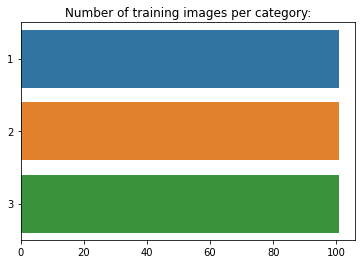

In [ ]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dense(nb_categories, activation='softmax'))
model.summary()


# for layer in conv_base.layers:
#   layer.trainable = False
  

  

# #folders = glob('/content/drive/My Drive/datasets_image/brain_tumor/train/*')
  


# x = Flatten()(conv_base.output)

# prediction = Dense(nb_categories, activation='softmax')(x)

# model = Model(inputs=conv_base.input, outputs=prediction)


# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
test_datagen =  ImageDataGenerator(
    rescale=1./255
)

In [ ]:
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 303 images belonging to 3 classes.
Total number of images for "validation":
Found 63 images belonging to 3 classes.
Total number of images for "testing":
Found 63 images belonging to 3 classes.


In [ ]:
learning_rate = .00001
epochs =1000
#checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics = ['acc','AUC'])




In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=2,restore_best_weights=True)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/1000
10/10 [==============================] - 16s 1s/step - loss: 7.9716 - acc: 0.3663 - auc: 0.5386 - val_loss: 2.3099 - val_acc: 0.3333 - val_auc: 0.5311
Epoch 2/1000
10/10 [==============================] - 9s 892ms/step - loss: 1.6862 - acc: 0.6535 - auc: 0.8274 - val_loss: 3.1857 - val_acc: 0.3333 - val_auc: 0.4681
Epoch 3/1000
10/10 [==============================] - 9s 891ms/step - loss: 0.7520 - acc: 0.7987 - auc: 0.9318 - val_loss: 4.2275 - val_acc: 0.3333 - val_auc: 0.4713
Epoch 4/1000
10/10 [==============================] - 9s 884ms/step - loss: 0.5148 - acc: 0.8944 - auc: 0.9572 - val_loss: 5.2587 - val_acc: 0.3333 - val_auc: 0.4548
Epoch 5/1000
10/10 [==============================] - 9s 899ms/step - loss: 0.2916 - acc: 0.9340 - auc: 0.9791 - val_loss: 6.6020 - val_acc: 0.3333 - val_auc: 0.4931
Epoch 6/1000
10/10 [==============================] - 9s 957ms/step - loss: 0.1975 - acc: 0.9505 - auc: 0.9899 - val_loss: 7.2986 - val_acc: 0.3333 - val_auc: 0.4613
Epoch 

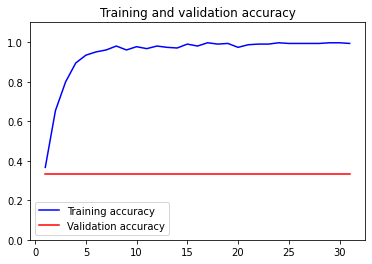

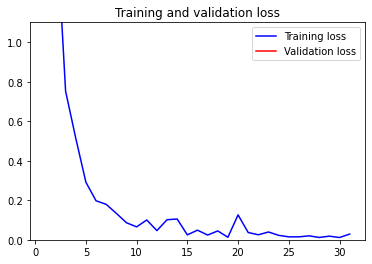

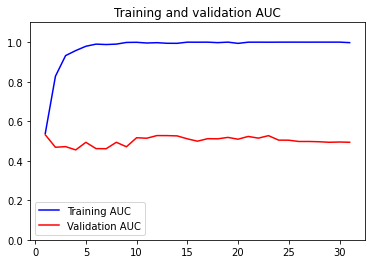

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Loss.png')

plt.figure()
plt.plot(epochs, AUC, 'b', label = 'Training AUC')
plt.plot(epochs, val_AUC, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('AUC.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
#  “””
#  This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#  “””
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
  
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment='center',
  color='white' if cm[i, j] > thresh else 'black')
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
#plot_confusion_matrix(cm, labels = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')
#plot_confusion_matrix(cm, labels = category_names,  normalize=False)#, figname = 'Confusion_matrix_concrete.jpg', title='Confusion Matrix'

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cm)

[[21  0  0]
 [21  0  0]
 [21  0  0]]


# Resnet50 performance

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 33.3% 


In [ ]:
confusion_metri=metrics.classification_report(test_generator.classes, y_pred,target_names=category_names)
print(confusion_metri)

              precision    recall  f1-score   support

           1       0.33      1.00      0.50        21
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        21

    accuracy                           0.33        63
   macro avg       0.11      0.33      0.17        63
weighted avg       0.11      0.33      0.17        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# another model

In [ ]:
img_height, img_width = 224,224
conv_base =ResNet101(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb211d2ed90> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb49f16ae90> True
<keras.layers.convolutional.Conv2D object at 0x7fb20dfffc10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb20e008210> True
<keras.layers.core.activation.Activation object at 0x7fb20dfff550> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb20e350590> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb20e012a10> True
<keras.layers.convolutional.Conv2D object at 0x7fb20e2a8350> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb20e016d50> True
<keras.layers.core.activation.Activation object at 0x7fb20e2a83d0> True
<keras.layers.convolutional.Conv2D object at 0x7fb20e0241d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb20e01bb50> True
<keras.layers.core.activation.Activation object at 0x7fb20e037a10> True
<keras.layer

Text(0.5, 1.0, 'Number of training images per category:')

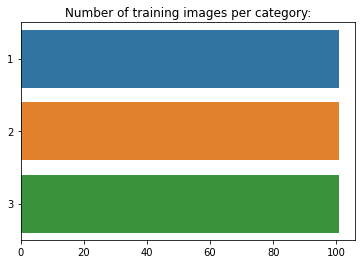

In [ ]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dense(nb_categories, activation='softmax'))
model.summary()


# for layer in conv_base.layers:
#   layer.trainable = False
  

  

# #folders = glob('/content/drive/My Drive/datasets_image/brain_tumor/train/*')
  


# x = Flatten()(conv_base.output)

# prediction = Dense(nb_categories, activation='softmax')(x)

# model = Model(inputs=conv_base.input, outputs=prediction)


# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 42,558,979
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
test_datagen =  ImageDataGenerator(
    rescale=1./255
)

In [ ]:
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 303 images belonging to 3 classes.
Total number of images for "validation":
Found 63 images belonging to 3 classes.
Total number of images for "testing":
Found 63 images belonging to 3 classes.


In [ ]:
learning_rate = .00001
epochs =1000
#checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics = ['acc','AUC'])




In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=2,restore_best_weights=True)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/1000
10/10 [==============================] - 23s 1s/step - loss: 3.4239 - acc: 0.5215 - auc: 0.6869 - val_loss: 3.5071 - val_acc: 0.3333 - val_auc: 0.4897
Epoch 2/1000
10/10 [==============================] - 10s 1000ms/step - loss: 0.7137 - acc: 0.8284 - auc: 0.9418 - val_loss: 3.4132 - val_acc: 0.3333 - val_auc: 0.5714
Epoch 3/1000
10/10 [==============================] - 10s 966ms/step - loss: 0.3296 - acc: 0.9043 - auc: 0.9769 - val_loss: 6.5342 - val_acc: 0.3333 - val_auc: 0.5000
Epoch 4/1000
10/10 [==============================] - 10s 971ms/step - loss: 0.2156 - acc: 0.9571 - auc: 0.9880 - val_loss: 10.7581 - val_acc: 0.3333 - val_auc: 0.5000
Epoch 5/1000
10/10 [==============================] - 10s 979ms/step - loss: 0.1107 - acc: 0.9604 - auc: 0.9955 - val_loss: 19.8492 - val_acc: 0.3333 - val_auc: 0.5000
Epoch 6/1000
10/10 [==============================] - 10s 976ms/step - loss: 0.1023 - acc: 0.9703 - auc: 0.9960 - val_loss: 28.4106 - val_acc: 0.3333 - val_auc: 0.50

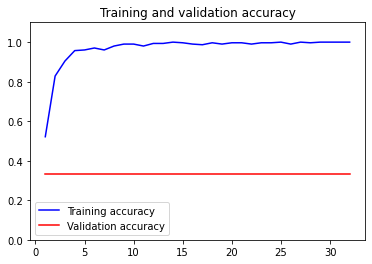

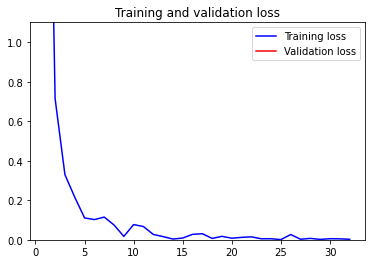

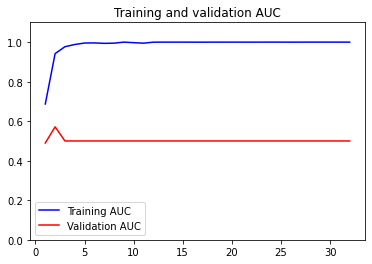

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Loss.png')

plt.figure()
plt.plot(epochs, AUC, 'b', label = 'Training AUC')
plt.plot(epochs, val_AUC, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('AUC.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
#  “””
#  This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#  “””
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
  
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment='center',
  color='white' if cm[i, j] > thresh else 'black')
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
#plot_confusion_matrix(cm, labels = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')
#plot_confusion_matrix(cm, labels = category_names,  normalize=False)#, figname = 'Confusion_matrix_concrete.jpg', title='Confusion Matrix'

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cm)

[[ 0 21  0]
 [ 0 21  0]
 [ 0 21  0]]


# Resnet101 performance

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 33.3% 


In [ ]:
confusion_metri=metrics.classification_report(test_generator.classes, y_pred,target_names=category_names)
print(confusion_metri)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.33      1.00      0.50        21
           3       0.00      0.00      0.00        21

    accuracy                           0.33        63
   macro avg       0.11      0.33      0.17        63
weighted avg       0.11      0.33      0.17        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# another another model

In [ ]:
img_height, img_width = 224,224
conv_base =ResNet152(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb49f16ad10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb49f43ddd0> True
<keras.layers.convolutional.Conv2D object at 0x7fb49f42c690> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb49f41b090> True
<keras.layers.core.activation.Activation object at 0x7fb3f5c18dd0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fb20ee5f050> True
<keras.layers.pooling.MaxPooling2D object at 0x7fb49f43b750> True
<keras.layers.convolutional.Conv2D object at 0x7fb49f4306d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb49f43b810> True
<keras.layers.core.activation.Activation object at 0x7fb3dabe3f10> True
<keras.layers.convolutional.Conv2D object at 0x7fb3dabe3cd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb3dabd3f50> True
<keras.layers.core.activation.Activation object at 0x7fb3dabddc90> True
<keras.layer

Text(0.5, 1.0, 'Number of training images per category:')

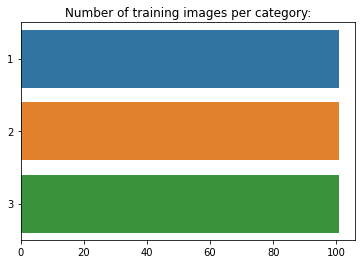

In [ ]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dense(nb_categories, activation='softmax'))
model.summary()


# for layer in conv_base.layers:
#   layer.trainable = False
  

  

# #folders = glob('/content/drive/My Drive/datasets_image/brain_tumor/train/*')
  


# x = Flatten()(conv_base.output)

# prediction = Dense(nb_categories, activation='softmax')(x)

# model = Model(inputs=conv_base.input, outputs=prediction)


# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 dense_5 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 58,377,091
Trainable params: 58,225,667
Non-trainable params: 151,424
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
test_datagen =  ImageDataGenerator(
    rescale=1./255
)

In [ ]:
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 303 images belonging to 3 classes.
Total number of images for "validation":
Found 63 images belonging to 3 classes.
Total number of images for "testing":
Found 63 images belonging to 3 classes.


In [ ]:
learning_rate = .00001
epochs =1000
#checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics = ['acc','AUC'])




In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss",patience=30,verbose=2,restore_best_weights=True)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/1000
10/10 [==============================] - 29s 1s/step - loss: 2.6607 - acc: 0.6271 - auc: 0.7609 - val_loss: 1.3871 - val_acc: 0.3333 - val_auc: 0.5429
Epoch 2/1000
10/10 [==============================] - 12s 1s/step - loss: 0.5768 - acc: 0.8779 - auc: 0.9539 - val_loss: 1.3791 - val_acc: 0.3333 - val_auc: 0.5620
Epoch 3/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1818 - acc: 0.9406 - auc: 0.9906 - val_loss: 1.9508 - val_acc: 0.3333 - val_auc: 0.5305
Epoch 4/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1368 - acc: 0.9571 - auc: 0.9950 - val_loss: 3.9411 - val_acc: 0.3333 - val_auc: 0.5091
Epoch 5/1000
10/10 [==============================] - 11s 1s/step - loss: 0.0809 - acc: 0.9802 - auc: 0.9970 - val_loss: 6.3771 - val_acc: 0.3333 - val_auc: 0.5000
Epoch 6/1000
10/10 [==============================] - 11s 1s/step - loss: 0.1348 - acc: 0.9703 - auc: 0.9894 - val_loss: 8.3156 - val_acc: 0.3333 - val_auc: 0.5000
Epoch 7/1000
10/

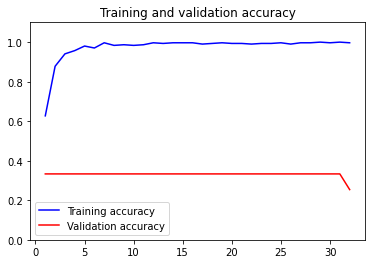

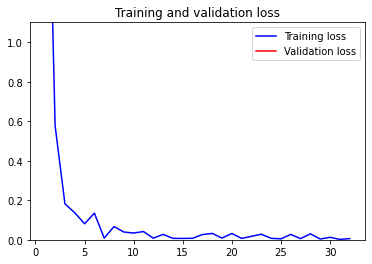

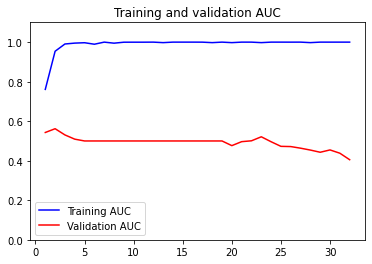

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Loss.png')

plt.figure()
plt.plot(epochs, AUC, 'b', label = 'Training AUC')
plt.plot(epochs, val_AUC, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('AUC.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
#  “””
#  This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#  “””
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
  
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment='center',
  color='white' if cm[i, j] > thresh else 'black')
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
#plot_confusion_matrix(cm, labels = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')
#plot_confusion_matrix(cm, labels = category_names,  normalize=False)#, figname = 'Confusion_matrix_concrete.jpg', title='Confusion Matrix'

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cm)

[[ 0  0 21]
 [ 0  0 21]
 [ 0  1 20]]


# Resnet152 performance

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 31.7% 


In [ ]:
confusion_metri=metrics.classification_report(test_generator.classes, y_pred,target_names=category_names)
print(confusion_metri)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        21
           3       0.32      0.95      0.48        21

    accuracy                           0.32        63
   macro avg       0.11      0.32      0.16        63
weighted avg       0.11      0.32      0.16        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ekhan theke baad

In [ ]:
def read_image(file_path):
   print('[INFO] loading and preprocessing image…') 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  animals = category_names
  
  images = read_image(path)

  # bt_prediction = model.predict(images) 
  # preds = model.predict_proba(bt_prediction)

  preds = model.predict_generator(images)

  bar_animal=[]
  bar_prob=[]

  for idx, animal, x in zip(range(0,3), animals , preds[0]):
    print('ID: {}, Label: {} {}%'.format(idx, animal, round(x*100,3) ))

    bar_animal=animal
    bar_prob=round(x*100,3)
    print(idx,animal)

    plt.bar(bar_animal,bar_prob)

  print('Final Decision:')
  
  #print(bar_animal)
  
  


  for x in range(3):
   print('.'*(x+1))
   
  # class_predicted = model.predict_classes(bt_prediction)
  # class_dictionary = generator_top.class_indices 
  # inv_map = {v: k for k, v in class_dictionary.items()} 
  # print('ID: {}, Label: {}'.format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array

# path = '/content/drive/My Drive/datasets_image/brain_tumor/train/2/96.png'
# #path='/content/drive/My Drive/cats_and_dogs/test/dog/dog.232.jpg'
# test_single_image(path)

In [ ]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 299x299
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()

In [ ]:
# img_size=[224,224]
# # Prepare image
# img_array = preprocess_input(get_img_array(path, size=img_size))

# # Make model
# model = model

# # # Remove last layer's softmax
# # model.layers[-1].activation = None

# # # Print what the top predicted class is
# # preds = model.predict(img_array)
# # print("Predicted:", decode_predictions(preds, top=1)[0])

# # Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img_array, model, "block5_conv4")

# # Display heatmap
# plt.matshow(heatmap)
# plt.show()

In [ ]:

# # We load the original image
# img = keras.preprocessing.image.load_img(path)
# img = keras.preprocessing.image.img_to_array(img)

# # We rescale heatmap to a range 0-255
# heatmap = np.uint8(255 * heatmap)

# # We use jet colormap to colorize heatmap
# jet = cm.get_cmap("jet")

# # We use RGB values of the colormap
# jet_colors = jet(np.arange(256))[:, :3]
# jet_heatmap = jet_colors[heatmap]

# # We create an image with RGB colorized heatmap
# jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
# jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
# jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# # Superimpose the heatmap on original image
# superimposed_img = jet_heatmap * 0.3 + img
# superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# # Save the superimposed image
# save_path = '/content/drive/My Drive/cats_and_dogs/test/dogtest1.jpg'
# superimposed_img.save(save_path)

# # Display Grad CAM
# display(Image(save_path))

# plt.imshow(superimposed_img)

In [ ]:
model.save('/content/drive/My Drive/datasets_image/brain_conf/res/final/model_final.h5' )

In [ ]:
model.save_weights('/content/drive/My Drive/datasets_image/brain_conf/res/final/model_weights_final.h5' )

In [ ]:
# print([layer.name for layer in model.get_layer('vgg19').layers])